In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

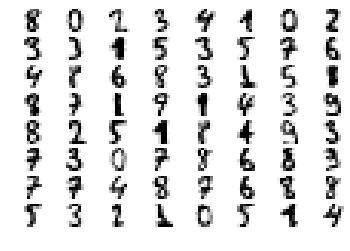

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 100)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49911 stdev: 0.06443
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.244
Mean genetic distance 3.036, standard deviation 0.512
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.597 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53434 stdev: 0.08032
Best fitness: 0.79468 - size: (3, 14) - species 23 - id 364
Average adjusted fitness: 0.263
Mean genetic distance 3.152, standard deviation 0.509
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.511 sec (7.554 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54715 stdev: 0.08620
Best fitness: 0.79468 - size: (3, 14) - species 23 - id 364
Average adjusted fitness: 0.237
Mean genetic distance 3.187, standard deviation 0.500
Population of 200 members in 39 species
Total extincti

Population's average fitness: 0.64629 stdev: 0.11105
Best fitness: 0.85838 - size: (7, 27) - species 22 - id 2982
Average adjusted fitness: 0.256
Mean genetic distance 3.205, standard deviation 0.516
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 8.208 sec (7.732 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65900 stdev: 0.10780
Best fitness: 0.85838 - size: (7, 27) - species 22 - id 2982
Average adjusted fitness: 0.251
Mean genetic distance 3.231, standard deviation 0.514
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.406 sec (7.676 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66082 stdev: 0.10667
Best fitness: 0.85838 - size: (7, 27) - species 22 - id 2982
Average adjusted fitness: 0.341
Mean genetic distance 3.240, standard deviation 0.500
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.867 sec (7.708 average)

 ******

Population's average fitness: 0.66251 stdev: 0.12242
Best fitness: 0.85838 - size: (7, 27) - species 22 - id 2982
Average adjusted fitness: 0.418
Mean genetic distance 3.278, standard deviation 0.524
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 8.803 sec (9.879 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64350 stdev: 0.11921
Best fitness: 0.85838 - size: (7, 27) - species 22 - id 2982
Average adjusted fitness: 0.206
Mean genetic distance 3.262, standard deviation 0.530
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 9.423 sec (9.902 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66443 stdev: 0.12116
Best fitness: 0.85838 - size: (7, 27) - species 22 - id 2982
Average adjusted fitness: 0.274
Mean genetic distance 3.269, standard deviation 0.538
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 9.659 sec (9.960 average)

 ******

Population's average fitness: 0.67472 stdev: 0.13302
Best fitness: 0.89920 - size: (8, 32) - species 63 - id 8378
Average adjusted fitness: 0.321
Mean genetic distance 3.185, standard deviation 0.593
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 9.243 sec (9.295 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67208 stdev: 0.13466
Best fitness: 0.89920 - size: (8, 32) - species 63 - id 8378
Average adjusted fitness: 0.383
Mean genetic distance 3.186, standard deviation 0.580
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 10.667 sec (9.496 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67850 stdev: 0.13136
Best fitness: 0.89920 - size: (8, 32) - species 63 - id 8378
Average adjusted fitness: 0.241
Mean genetic distance 3.128, standard deviation 0.571
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.060 sec (9.651 average)

 ****

Population's average fitness: 0.71033 stdev: 0.12871
Best fitness: 0.89920 - size: (8, 32) - species 63 - id 8378
Average adjusted fitness: 0.478
Mean genetic distance 3.080, standard deviation 0.598
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 12.247 sec (10.063 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.70234 stdev: 0.12961
Best fitness: 0.89920 - size: (8, 32) - species 63 - id 8378
Average adjusted fitness: 0.311
Mean genetic distance 3.064, standard deviation 0.594
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 9.102 sec (10.045 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.70525 stdev: 0.13255
Best fitness: 0.89920 - size: (8, 32) - species 63 - id 8378
Average adjusted fitness: 0.265
Mean genetic distance 3.093, standard deviation 0.603
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 9.627 sec (9.665 average)

 ***

Population's average fitness: 0.63758 stdev: 0.08634
Best fitness: 0.77427 - size: (4, 17) - species 23 - id 1034
Average adjusted fitness: 0.249
Mean genetic distance 3.209, standard deviation 0.503
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 7.557 sec (7.072 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64088 stdev: 0.09042
Best fitness: 0.78355 - size: (8, 25) - species 6 - id 2865
Average adjusted fitness: 0.253
Mean genetic distance 3.210, standard deviation 0.506
Population of 185 members in 39 species
Total extinctions: 0
Generation time: 7.922 sec (7.173 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64433 stdev: 0.08402
Best fitness: 0.78355 - size: (8, 25) - species 6 - id 2865
Average adjusted fitness: 0.186
Mean genetic distance 3.252, standard deviation 0.504
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 7.286 sec (7.234 average)

 ****** R

Mean genetic distance 3.215, standard deviation 0.551
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 10.913 sec (10.175 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.63762 stdev: 0.09191
Best fitness: 0.79716 - size: (3, 16) - species 22 - id 5133
Average adjusted fitness: 0.180
Mean genetic distance 3.213, standard deviation 0.555
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 9.626 sec (10.262 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.64020 stdev: 0.09184
Best fitness: 0.79716 - size: (3, 16) - species 22 - id 5133
Average adjusted fitness: 0.329
Mean genetic distance 3.213, standard deviation 0.559
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 9.479 sec (10.387 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64164 stdev: 0.09677
Best fitness: 0.79716 - size: (3, 16) - species 22 - id 5

Mean genetic distance 3.205, standard deviation 0.597
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 10.664 sec (11.107 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.64904 stdev: 0.09758
Best fitness: 0.82313 - size: (5, 19) - species 22 - id 8263
Average adjusted fitness: 0.217
Mean genetic distance 3.201, standard deviation 0.597
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 10.753 sec (11.080 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.65069 stdev: 0.09930
Best fitness: 0.82313 - size: (5, 19) - species 22 - id 8263
Average adjusted fitness: 0.231
Mean genetic distance 3.170, standard deviation 0.593
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 13.280 sec (11.390 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.64501 stdev: 0.10147
Best fitness: 0.82313 - size: (5, 19) - species 22 - id

Mean genetic distance 3.086, standard deviation 0.601
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 10.669 sec (9.557 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.66099 stdev: 0.10443
Best fitness: 0.82498 - size: (5, 17) - species 22 - id 10804
Average adjusted fitness: 0.185
Mean genetic distance 3.094, standard deviation 0.612
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 13.838 sec (10.039 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.67121 stdev: 0.10717
Best fitness: 0.82498 - size: (5, 17) - species 22 - id 10804
Average adjusted fitness: 0.228
Mean genetic distance 3.081, standard deviation 0.598
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 11.951 sec (10.303 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.68066 stdev: 0.10117
Best fitness: 0.82498 - size: (5, 17) - species 22 - i

Mean genetic distance 3.255, standard deviation 0.483
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 10.012 sec (7.445 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59249 stdev: 0.07312
Best fitness: 0.73284 - size: (5, 16) - species 43 - id 1932
Average adjusted fitness: 0.229
Mean genetic distance 3.280, standard deviation 0.489
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.636 sec (7.655 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59159 stdev: 0.07117
Best fitness: 0.73284 - size: (5, 16) - species 43 - id 1932
Average adjusted fitness: 0.171
Mean genetic distance 3.266, standard deviation 0.484
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 9.334 sec (7.892 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59241 stdev: 0.07469
Best fitness: 0.74644 - size: (5, 17) - species 25 - id 2538

Mean genetic distance 3.292, standard deviation 0.537
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 11.188 sec (12.456 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.61859 stdev: 0.07872
Best fitness: 0.75139 - size: (8, 26) - species 7 - id 5536
Average adjusted fitness: 0.194
Mean genetic distance 3.313, standard deviation 0.534
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 8.422 sec (11.429 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60368 stdev: 0.08162
Best fitness: 0.75139 - size: (8, 26) - species 7 - id 5536
Average adjusted fitness: 0.264
Mean genetic distance 3.318, standard deviation 0.534
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.029 sec (10.610 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.61089 stdev: 0.07755
Best fitness: 0.75139 - size: (8, 26) - species 7 - id 5536

Mean genetic distance 3.316, standard deviation 0.638
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 9.638 sec (10.641 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.62162 stdev: 0.08604
Best fitness: 0.77118 - size: (8, 29) - species 34 - id 8808
Average adjusted fitness: 0.163
Mean genetic distance 3.314, standard deviation 0.626
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 10.064 sec (10.717 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.62421 stdev: 0.08323
Best fitness: 0.77118 - size: (8, 29) - species 34 - id 8808
Average adjusted fitness: 0.305
Mean genetic distance 3.323, standard deviation 0.641
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 11.303 sec (10.961 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.61483 stdev: 0.08401
Best fitness: 0.77118 - size: (8, 29) - species 34 - id 

Mean genetic distance 3.285, standard deviation 0.674
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 9.533 sec (10.818 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.61848 stdev: 0.07783
Best fitness: 0.78108 - size: (9, 30) - species 34 - id 11982
Average adjusted fitness: 0.153
Mean genetic distance 3.282, standard deviation 0.673
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 11.171 sec (10.625 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.62726 stdev: 0.07934
Best fitness: 0.78108 - size: (9, 30) - species 34 - id 11982
Average adjusted fitness: 0.193
Mean genetic distance 3.286, standard deviation 0.643
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 10.320 sec (10.365 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.62747 stdev: 0.07737
Best fitness: 0.78108 - size: (9, 30) - species 34 - i

Mean genetic distance 3.191, standard deviation 0.490
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 7.069 sec (7.168 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66175 stdev: 0.15294
Best fitness: 0.85034 - size: (4, 16) - species 34 - id 942
Average adjusted fitness: 0.418
Mean genetic distance 3.162, standard deviation 0.476
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 10.259 sec (7.532 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68011 stdev: 0.13944
Best fitness: 0.85034 - size: (4, 16) - species 34 - id 942
Average adjusted fitness: 0.365
Mean genetic distance 3.162, standard deviation 0.480
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 9.722 sec (7.853 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66963 stdev: 0.14333
Best fitness: 0.85034 - size: (4, 16) - species 34 - id 942
Av

Mean genetic distance 3.266, standard deviation 0.501
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.693 sec (7.869 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.68534 stdev: 0.15245
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889
Average adjusted fitness: 0.424
Mean genetic distance 3.258, standard deviation 0.508
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.798 sec (7.895 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.68430 stdev: 0.16016
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889
Average adjusted fitness: 0.423
Mean genetic distance 3.263, standard deviation 0.510
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 7.786 sec (7.819 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.68876 stdev: 0.15300
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889


Mean genetic distance 3.253, standard deviation 0.569
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.519 sec (9.449 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.69922 stdev: 0.14656
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889
Average adjusted fitness: 0.414
Mean genetic distance 3.260, standard deviation 0.582
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 11.844 sec (9.706 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.67504 stdev: 0.15732
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889
Average adjusted fitness: 0.396
Mean genetic distance 3.226, standard deviation 0.573
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 11.424 sec (9.894 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.68556 stdev: 0.15355
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 48

Total extinctions: 0
Generation time: 10.700 sec (9.897 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.68718 stdev: 0.15898
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889
Average adjusted fitness: 0.382
Mean genetic distance 3.179, standard deviation 0.620
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 9.026 sec (9.763 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.68964 stdev: 0.16387
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889
Average adjusted fitness: 0.386
Mean genetic distance 3.174, standard deviation 0.639
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 9.147 sec (9.670 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.69581 stdev: 0.16144
Best fitness: 0.89177 - size: (7, 19) - species 45 - id 4889
Average adjusted fitness: 0.396
Mean genetic distance 3.137, standard deviation 0.632
Populat

Total extinctions: 0
Generation time: 6.706 sec (6.693 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61739 stdev: 0.08910
Best fitness: 0.77613 - size: (3, 14) - species 11 - id 664
Average adjusted fitness: 0.325
Mean genetic distance 3.082, standard deviation 0.466
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.749 sec (6.698 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61492 stdev: 0.09658
Best fitness: 0.77798 - size: (5, 20) - species 19 - id 1582
Average adjusted fitness: 0.291
Mean genetic distance 3.105, standard deviation 0.488
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.300 sec (6.849 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61941 stdev: 0.09379
Best fitness: 0.77798 - size: (5, 20) - species 19 - id 1582
Average adjusted fitness: 0.284
Mean genetic distance 3.093, standard deviation 0.471
Population

Population's average fitness: 0.65523 stdev: 0.10630
Best fitness: 0.85281 - size: (6, 26) - species 5 - id 4089
Average adjusted fitness: 0.362
Mean genetic distance 3.159, standard deviation 0.531
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 8.325 sec (7.838 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.64527 stdev: 0.10933
Best fitness: 0.85281 - size: (6, 26) - species 5 - id 4089
Average adjusted fitness: 0.321
Mean genetic distance 3.158, standard deviation 0.548
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 9.084 sec (8.010 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65219 stdev: 0.10339
Best fitness: 0.85281 - size: (6, 26) - species 5 - id 4089
Average adjusted fitness: 0.209
Mean genetic distance 3.122, standard deviation 0.549
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 9.128 sec (8.181 average)

 ****** Ru

Mean genetic distance 3.069, standard deviation 0.558
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 8.031 sec (8.759 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.68023 stdev: 0.10123
Best fitness: 0.85591 - size: (6, 25) - species 5 - id 6353
Average adjusted fitness: 0.317
Mean genetic distance 3.054, standard deviation 0.577
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 7.982 sec (8.667 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.67913 stdev: 0.09631
Best fitness: 0.85591 - size: (6, 25) - species 5 - id 6353
Average adjusted fitness: 0.209
Mean genetic distance 3.040, standard deviation 0.593
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 8.233 sec (8.498 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.67849 stdev: 0.11317
Best fitness: 0.85591 - size: (6, 25) - species 5 - id 6353
Ave

Mean genetic distance 3.021, standard deviation 0.595
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 8.954 sec (9.456 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.66728 stdev: 0.10860
Best fitness: 0.85591 - size: (6, 25) - species 5 - id 6353
Average adjusted fitness: 0.258
Mean genetic distance 2.982, standard deviation 0.612
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 11.082 sec (9.715 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.67992 stdev: 0.10495
Best fitness: 0.85591 - size: (6, 25) - species 5 - id 6353
Average adjusted fitness: 0.225
Mean genetic distance 2.995, standard deviation 0.596
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 8.404 sec (9.701 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.68210 stdev: 0.10806
Best fitness: 0.85591 - size: (6, 25) - species 5 - id 6353
Av

Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.688 sec (6.213 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58254 stdev: 0.08230
Best fitness: 0.75819 - size: (3, 14) - species 13 - id 258
Average adjusted fitness: 0.195
Mean genetic distance 3.108, standard deviation 0.492
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.723 sec (6.286 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59818 stdev: 0.08296
Best fitness: 0.75819 - size: (3, 14) - species 13 - id 258
Average adjusted fitness: 0.240
Mean genetic distance 3.090, standard deviation 0.488
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 6.963 sec (6.371 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60232 stdev: 0.08374
Best fitness: 0.75819 - size: (3, 14) - species 13 - id 258
Average adjusted fitness: 0.238
Mean genetic distance 3.103,

Population's average fitness: 0.63621 stdev: 0.09609
Best fitness: 0.79777 - size: (12, 33) - species 37 - id 3840
Average adjusted fitness: 0.288
Mean genetic distance 3.246, standard deviation 0.483
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.155 sec (8.276 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64174 stdev: 0.09126
Best fitness: 0.79777 - size: (12, 33) - species 37 - id 3840
Average adjusted fitness: 0.284
Mean genetic distance 3.264, standard deviation 0.489
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.337 sec (8.532 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.64007 stdev: 0.09573
Best fitness: 0.79777 - size: (12, 33) - species 37 - id 3840
Average adjusted fitness: 0.285
Mean genetic distance 3.289, standard deviation 0.487
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.372 sec (8.757 average)

 *

Mean genetic distance 3.133, standard deviation 0.603
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 9.718 sec (10.152 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.65908 stdev: 0.10347
Best fitness: 0.80581 - size: (10, 28) - species 45 - id 6727
Average adjusted fitness: 0.325
Mean genetic distance 3.156, standard deviation 0.598
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 9.609 sec (10.072 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.66103 stdev: 0.09600
Best fitness: 0.81138 - size: (11, 29) - species 45 - id 7908
Average adjusted fitness: 0.273
Mean genetic distance 3.272, standard deviation 0.611
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 9.830 sec (9.929 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65509 stdev: 0.09823
Best fitness: 0.81138 - size: (11, 29) - species 45 - id 

Mean genetic distance 3.224, standard deviation 0.623
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 12.867 sec (10.773 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.66868 stdev: 0.10546
Best fitness: 0.84168 - size: (21, 53) - species 37 - id 11818
Average adjusted fitness: 0.255
Mean genetic distance 3.184, standard deviation 0.596
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.794 sec (10.954 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.66499 stdev: 0.10448
Best fitness: 0.84168 - size: (21, 53) - species 37 - id 11818
Average adjusted fitness: 0.251
Mean genetic distance 3.169, standard deviation 0.608
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 12.957 sec (11.000 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65648 stdev: 0.10206
Best fitness: 0.84168 - size: (21, 53) - species 37

Population's average fitness: 0.53598 stdev: 0.05380
Best fitness: 0.72913 - size: (3, 15) - species 6 - id 376
Average adjusted fitness: 0.101
Mean genetic distance 3.016, standard deviation 0.464
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.522 sec (8.078 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54611 stdev: 0.06477
Best fitness: 0.72913 - size: (3, 15) - species 6 - id 376
Average adjusted fitness: 0.268
Mean genetic distance 3.074, standard deviation 0.474
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 10.057 sec (8.573 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55907 stdev: 0.07214
Best fitness: 0.73222 - size: (4, 18) - species 32 - id 761
Average adjusted fitness: 0.190
Mean genetic distance 3.118, standard deviation 0.473
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.064 sec (8.471 average)

 ****** Runni

Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.563 sec (7.656 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60834 stdev: 0.07977
Best fitness: 0.76005 - size: (5, 18) - species 31 - id 1701
Average adjusted fitness: 0.188
Mean genetic distance 3.293, standard deviation 0.503
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 7.862 sec (7.713 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60601 stdev: 0.08107
Best fitness: 0.76005 - size: (5, 18) - species 31 - id 1701
Average adjusted fitness: 0.233
Mean genetic distance 3.262, standard deviation 0.511
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 8.691 sec (7.859 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60090 stdev: 0.08074
Best fitness: 0.76005 - size: (5, 18) - species 31 - id 1701
Average adjusted fitness: 0.149
Mean genetic distance 

Mean genetic distance 3.364, standard deviation 0.551
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.603 sec (9.977 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62368 stdev: 0.07883
Best fitness: 0.78293 - size: (7, 19) - species 53 - id 6248
Average adjusted fitness: 0.150
Mean genetic distance 3.361, standard deviation 0.572
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.951 sec (9.825 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.62113 stdev: 0.08058
Best fitness: 0.78293 - size: (7, 19) - species 53 - id 6248
Average adjusted fitness: 0.292
Mean genetic distance 3.369, standard deviation 0.579
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.952 sec (9.834 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.61802 stdev: 0.08223
Best fitness: 0.78293 - size: (7, 19) - species 53 - id 6248


Mean genetic distance 3.252, standard deviation 0.572
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 9.868 sec (10.176 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.63571 stdev: 0.09222
Best fitness: 0.78293 - size: (7, 19) - species 53 - id 6248
Average adjusted fitness: 0.328
Mean genetic distance 3.283, standard deviation 0.580
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 13.766 sec (10.581 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.62747 stdev: 0.09428
Best fitness: 0.78293 - size: (7, 19) - species 53 - id 6248
Average adjusted fitness: 0.296
Mean genetic distance 3.242, standard deviation 0.569
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.191 sec (10.751 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.63786 stdev: 0.08319
Best fitness: 0.78293 - size: (7, 19) - species 53 - id 

Mean genetic distance 3.221, standard deviation 0.605
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.485 sec (12.638 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.64467 stdev: 0.09495
Best fitness: 0.78293 - size: (10, 29) - species 66 - id 14786
Average adjusted fitness: 0.234
Mean genetic distance 3.240, standard deviation 0.600
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.954 sec (12.651 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.49783 stdev: 0.05365
Best fitness: 0.64564 - size: (2, 13) - species 1 - id 124
Average adjusted fitness: 0.144
Mean genetic distance 2.961, standard deviation 0.505
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.591 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52476 stdev: 0.05711
Best fitness: 0.69635 - size: (3,

Mean genetic distance 3.123, standard deviation 0.471
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 10.727 sec (7.461 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60120 stdev: 0.07607
Best fitness: 0.76376 - size: (5, 23) - species 37 - id 2924
Average adjusted fitness: 0.227
Mean genetic distance 3.143, standard deviation 0.478
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 10.201 sec (7.796 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59648 stdev: 0.08135
Best fitness: 0.76376 - size: (5, 23) - species 37 - id 2924
Average adjusted fitness: 0.246
Mean genetic distance 3.152, standard deviation 0.473
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.917 sec (8.001 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59890 stdev: 0.07772
Best fitness: 0.76376 - size: (5, 23) - species 37 - id 292

Population of 194 members in 22 species
Total extinctions: 0
Generation time: 7.942 sec (8.502 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.61533 stdev: 0.08268
Best fitness: 0.79097 - size: (6, 26) - species 46 - id 4695
Average adjusted fitness: 0.195
Mean genetic distance 3.180, standard deviation 0.525
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 8.582 sec (8.532 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.62521 stdev: 0.08109
Best fitness: 0.79097 - size: (6, 26) - species 46 - id 4695
Average adjusted fitness: 0.178
Mean genetic distance 3.194, standard deviation 0.508
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 9.447 sec (8.566 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62452 stdev: 0.08966
Best fitness: 0.79097 - size: (6, 26) - species 46 - id 4695
Average adjusted fitness: 0.329
Mean genetic distance 

Mean genetic distance 3.176, standard deviation 0.538
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 8.194 sec (8.706 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.64153 stdev: 0.09043
Best fitness: 0.79530 - size: (7, 28) - species 46 - id 9265
Average adjusted fitness: 0.180
Mean genetic distance 3.168, standard deviation 0.539
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 8.527 sec (8.584 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.63692 stdev: 0.09370
Best fitness: 0.79530 - size: (7, 28) - species 46 - id 9265
Average adjusted fitness: 0.227
Mean genetic distance 3.160, standard deviation 0.573
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.312 sec (8.605 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64474 stdev: 0.09272
Best fitness: 0.79530 - size: (7, 28) - species 46 - id 9265


Mean genetic distance 3.196, standard deviation 0.575
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.348 sec (9.225 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.65332 stdev: 0.09307
Best fitness: 0.80334 - size: (8, 30) - species 46 - id 11563
Average adjusted fitness: 0.220
Mean genetic distance 3.189, standard deviation 0.572
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.500 sec (9.220 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.65162 stdev: 0.09697
Best fitness: 0.80334 - size: (8, 30) - species 46 - id 11563
Average adjusted fitness: 0.232
Mean genetic distance 3.201, standard deviation 0.579
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 9.489 sec (9.256 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65000 stdev: 0.09167
Best fitness: 0.80334 - size: (8, 30) - species 46 - id 115

Total extinctions: 0
Generation time: 7.065 sec (6.659 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61195 stdev: 0.08119
Best fitness: 0.79283 - size: (5, 18) - species 34 - id 1346
Average adjusted fitness: 0.297
Mean genetic distance 3.176, standard deviation 0.521
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.542 sec (6.610 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60962 stdev: 0.08187
Best fitness: 0.79283 - size: (5, 18) - species 34 - id 1346
Average adjusted fitness: 0.247
Mean genetic distance 3.136, standard deviation 0.531
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.523 sec (6.601 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60887 stdev: 0.08473
Best fitness: 0.79283 - size: (5, 18) - species 34 - id 1346
Average adjusted fitness: 0.256
Mean genetic distance 3.135, standard deviation 0.537
Populati

Population of 198 members in 22 species
Total extinctions: 0
Generation time: 8.226 sec (8.089 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63031 stdev: 0.08500
Best fitness: 0.81633 - size: (5, 18) - species 24 - id 5159
Average adjusted fitness: 0.204
Mean genetic distance 3.225, standard deviation 0.537
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 8.215 sec (8.109 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63131 stdev: 0.08535
Best fitness: 0.81633 - size: (5, 18) - species 24 - id 5159
Average adjusted fitness: 0.146
Mean genetic distance 3.236, standard deviation 0.538
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 8.116 sec (8.123 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62013 stdev: 0.08981
Best fitness: 0.81633 - size: (5, 18) - species 24 - id 5159
Average adjusted fitness: 0.163
Mean genetic distance 

Mean genetic distance 3.218, standard deviation 0.599
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 9.464 sec (9.095 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.63148 stdev: 0.08959
Best fitness: 0.82127 - size: (7, 22) - species 34 - id 7758
Average adjusted fitness: 0.145
Mean genetic distance 3.250, standard deviation 0.579
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 9.006 sec (9.105 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62129 stdev: 0.09918
Best fitness: 0.82127 - size: (7, 22) - species 34 - id 7758
Average adjusted fitness: 0.208
Mean genetic distance 3.244, standard deviation 0.574
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 9.162 sec (9.137 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.62608 stdev: 0.09126
Best fitness: 0.82127 - size: (7, 22) - species 34 - id 7758


Mean genetic distance 3.160, standard deviation 0.567
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 9.466 sec (9.278 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.61841 stdev: 0.09530
Best fitness: 0.82127 - size: (7, 22) - species 51 - id 7758
Average adjusted fitness: 0.292
Mean genetic distance 3.155, standard deviation 0.570
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 9.652 sec (9.378 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.61940 stdev: 0.09432
Best fitness: 0.82127 - size: (7, 22) - species 51 - id 7758
Average adjusted fitness: 0.160
Mean genetic distance 3.152, standard deviation 0.570
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 9.442 sec (9.392 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.61231 stdev: 0.09479
Best fitness: 0.82189 - size: (9, 24) - species 51 - id 14556

Mean genetic distance 3.222, standard deviation 0.467
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 6.839 sec (6.718 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63585 stdev: 0.09702
Best fitness: 0.81262 - size: (6, 19) - species 26 - id 1673
Average adjusted fitness: 0.259
Mean genetic distance 3.213, standard deviation 0.467
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 6.909 sec (6.758 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64081 stdev: 0.10110
Best fitness: 0.81262 - size: (6, 19) - species 26 - id 1673
Average adjusted fitness: 0.254
Mean genetic distance 3.220, standard deviation 0.472
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 8.433 sec (6.914 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64234 stdev: 0.09979
Best fitness: 0.81262 - size: (6, 19) - species 26 - id 1673


Mean genetic distance 3.335, standard deviation 0.527
Population of 210 members in 27 species
Total extinctions: 0
Generation time: 7.891 sec (7.552 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.65036 stdev: 0.11700
Best fitness: 0.84972 - size: (6, 25) - species 19 - id 4857
Average adjusted fitness: 0.409
Mean genetic distance 3.307, standard deviation 0.521
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.353 sec (7.651 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.66563 stdev: 0.10897
Best fitness: 0.84972 - size: (6, 25) - species 19 - id 4857
Average adjusted fitness: 0.263
Mean genetic distance 3.308, standard deviation 0.525
Population of 207 members in 26 species
Total extinctions: 0
Generation time: 7.757 sec (7.689 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.65981 stdev: 0.11746
Best fitness: 0.84972 - size: (6, 25) - species 19 - id 4857


Mean genetic distance 3.214, standard deviation 0.533
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 8.172 sec (8.372 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.69908 stdev: 0.11007
Best fitness: 0.85776 - size: (9, 24) - species 64 - id 7491
Average adjusted fitness: 0.327
Mean genetic distance 3.169, standard deviation 0.541
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 8.003 sec (8.352 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.68442 stdev: 0.11989
Best fitness: 0.85776 - size: (9, 24) - species 64 - id 7491
Average adjusted fitness: 0.360
Mean genetic distance 3.170, standard deviation 0.539
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 7.925 sec (8.304 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.69097 stdev: 0.11316
Best fitness: 0.85776 - size: (9, 24) - species 64 - id 7491


Mean genetic distance 3.205, standard deviation 0.544
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.713 sec (8.596 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.67624 stdev: 0.12797
Best fitness: 0.86333 - size: (11, 27) - species 64 - id 12382
Average adjusted fitness: 0.437
Mean genetic distance 3.233, standard deviation 0.555
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 8.730 sec (8.623 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.67294 stdev: 0.13045
Best fitness: 0.86333 - size: (11, 27) - species 64 - id 12382
Average adjusted fitness: 0.436
Mean genetic distance 3.220, standard deviation 0.556
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 8.650 sec (8.649 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.69524 stdev: 0.11701
Best fitness: 0.86456 - size: (9, 30) - species 82 - id 1

Mean genetic distance 3.120, standard deviation 0.480
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.800 sec (6.416 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59895 stdev: 0.07665
Best fitness: 0.79159 - size: (3, 15) - species 31 - id 1700
Average adjusted fitness: 0.203
Mean genetic distance 3.119, standard deviation 0.468
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.855 sec (6.505 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59954 stdev: 0.07752
Best fitness: 0.79159 - size: (3, 15) - species 31 - id 1700
Average adjusted fitness: 0.232
Mean genetic distance 3.108, standard deviation 0.463
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.008 sec (6.598 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60200 stdev: 0.07332
Best fitness: 0.79159 - size: (3, 15) - species 31 - id 1700


Mean genetic distance 3.259, standard deviation 0.497
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.729 sec (7.735 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.63048 stdev: 0.08042
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.174
Mean genetic distance 3.263, standard deviation 0.523
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.586 sec (7.731 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.63680 stdev: 0.07798
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.179
Mean genetic distance 3.266, standard deviation 0.514
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 7.279 sec (7.693 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62612 stdev: 0.08294
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566


Total extinctions: 0
Generation time: 8.239 sec (7.926 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.63301 stdev: 0.08944
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.264
Mean genetic distance 3.194, standard deviation 0.565
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 8.093 sec (7.966 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.63060 stdev: 0.08846
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.225
Mean genetic distance 3.224, standard deviation 0.545
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.096 sec (7.993 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.63550 stdev: 0.08940
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.189
Mean genetic distance 3.210, standard deviation 0.549
Populati

Population's average fitness: 0.65257 stdev: 0.09420
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.232
Mean genetic distance 3.192, standard deviation 0.602
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 8.890 sec (9.159 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.64477 stdev: 0.09004
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.159
Mean genetic distance 3.211, standard deviation 0.604
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 9.009 sec (9.168 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64540 stdev: 0.09616
Best fitness: 0.81942 - size: (4, 17) - species 31 - id 2566
Average adjusted fitness: 0.184
Mean genetic distance 3.209, standard deviation 0.582
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 9.405 sec (9.007 average)

 ******

Population's average fitness: 0.65836 stdev: 0.12706
Best fitness: 0.84230 - size: (6, 18) - species 15 - id 1070
Average adjusted fitness: 0.370
Mean genetic distance 3.070, standard deviation 0.477
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.631 sec (6.736 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67691 stdev: 0.10935
Best fitness: 0.84230 - size: (6, 18) - species 15 - id 1070
Average adjusted fitness: 0.368
Mean genetic distance 3.054, standard deviation 0.480
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.665 sec (6.728 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67964 stdev: 0.11663
Best fitness: 0.84230 - size: (6, 18) - species 15 - id 1070
Average adjusted fitness: 0.394
Mean genetic distance 3.081, standard deviation 0.481
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.743 sec (6.730 average)

 ****** R

Population's average fitness: 0.69890 stdev: 0.12150
Best fitness: 0.84663 - size: (6, 18) - species 15 - id 1682
Average adjusted fitness: 0.470
Mean genetic distance 3.230, standard deviation 0.467
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.221 sec (7.161 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.70473 stdev: 0.11604
Best fitness: 0.84663 - size: (6, 18) - species 15 - id 1682
Average adjusted fitness: 0.403
Mean genetic distance 3.239, standard deviation 0.462
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.224 sec (7.171 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.68939 stdev: 0.13682
Best fitness: 0.84663 - size: (6, 18) - species 15 - id 1682
Average adjusted fitness: 0.397
Mean genetic distance 3.226, standard deviation 0.475
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.317 sec (7.202 average)

 ******

Population's average fitness: 0.70850 stdev: 0.10621
Best fitness: 0.85714 - size: (6, 24) - species 43 - id 5947
Average adjusted fitness: 0.411
Mean genetic distance 3.280, standard deviation 0.527
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 8.212 sec (7.956 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.70155 stdev: 0.12381
Best fitness: 0.85714 - size: (6, 24) - species 43 - id 5947
Average adjusted fitness: 0.401
Mean genetic distance 3.300, standard deviation 0.529
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 7.932 sec (7.955 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.70782 stdev: 0.11144
Best fitness: 0.85714 - size: (6, 24) - species 43 - id 5947
Average adjusted fitness: 0.428
Mean genetic distance 3.283, standard deviation 0.542
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.417 sec (8.005 average)

 ******

Population's average fitness: 0.70603 stdev: 0.13837
Best fitness: 0.85714 - size: (6, 24) - species 72 - id 5947
Average adjusted fitness: 0.426
Mean genetic distance 3.269, standard deviation 0.595
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 10.481 sec (9.407 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.71427 stdev: 0.12521
Best fitness: 0.85714 - size: (6, 24) - species 72 - id 5947
Average adjusted fitness: 0.406
Mean genetic distance 3.243, standard deviation 0.610
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 8.929 sec (9.441 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.72054 stdev: 0.12541
Best fitness: 0.85714 - size: (6, 24) - species 72 - id 5947
Average adjusted fitness: 0.448
Mean genetic distance 3.206, standard deviation 0.605
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 9.450 sec (9.468 average)

 *****


Population's average fitness: 0.65182 stdev: 0.11422
Best fitness: 0.82375 - size: (3, 15) - species 3 - id 379
Average adjusted fitness: 0.354
Mean genetic distance 2.907, standard deviation 0.468
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 6.101 sec (5.747 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65731 stdev: 0.11424
Best fitness: 0.82375 - size: (3, 15) - species 3 - id 379
Average adjusted fitness: 0.345
Mean genetic distance 2.921, standard deviation 0.461
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.280 sec (5.854 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66245 stdev: 0.12159
Best fitness: 0.84168 - size: (3, 14) - species 5 - id 965
Average adjusted fitness: 0.372
Mean genetic distance 2.968, standard deviation 0.468
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 6.172 sec (5.907 average)

 ****** Runnin

Population's average fitness: 0.71410 stdev: 0.09850
Best fitness: 0.84416 - size: (4, 16) - species 5 - id 1769
Average adjusted fitness: 0.399
Mean genetic distance 3.205, standard deviation 0.519
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 8.436 sec (7.220 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70669 stdev: 0.12097
Best fitness: 0.85591 - size: (5, 18) - species 5 - id 3937
Average adjusted fitness: 0.432
Mean genetic distance 3.211, standard deviation 0.527
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.337 sec (7.246 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71456 stdev: 0.10546
Best fitness: 0.85591 - size: (5, 18) - species 5 - id 3937
Average adjusted fitness: 0.413
Mean genetic distance 3.224, standard deviation 0.507
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 7.494 sec (7.296 average)

 ****** Ru

Population's average fitness: 0.70310 stdev: 0.13139
Best fitness: 0.86889 - size: (10, 34) - species 31 - id 6558
Average adjusted fitness: 0.473
Mean genetic distance 3.251, standard deviation 0.530
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 8.721 sec (8.679 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.73649 stdev: 0.08919
Best fitness: 0.86889 - size: (10, 34) - species 31 - id 6558
Average adjusted fitness: 0.391
Mean genetic distance 3.228, standard deviation 0.524
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 8.598 sec (8.701 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.71917 stdev: 0.11463
Best fitness: 0.86889 - size: (10, 34) - species 31 - id 6558
Average adjusted fitness: 0.493
Mean genetic distance 3.241, standard deviation 0.531
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 9.164 sec (8.772 average)

 ***

Population's average fitness: 0.71058 stdev: 0.12799
Best fitness: 0.89301 - size: (9, 27) - species 5 - id 10844
Average adjusted fitness: 0.466
Mean genetic distance 3.345, standard deviation 0.552
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 9.038 sec (8.814 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.71929 stdev: 0.13206
Best fitness: 0.89301 - size: (9, 27) - species 55 - id 10844
Average adjusted fitness: 0.416
Mean genetic distance 3.349, standard deviation 0.554
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 9.136 sec (8.823 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.72546 stdev: 0.10401
Best fitness: 0.89301 - size: (9, 27) - species 55 - id 10844
Average adjusted fitness: 0.371
Mean genetic distance 3.352, standard deviation 0.568
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 9.077 sec (8.857 average)

 ****

Population's average fitness: 0.71630 stdev: 0.13098
Best fitness: 0.89301 - size: (9, 27) - species 55 - id 10844
Average adjusted fitness: 0.419
Mean genetic distance 3.108, standard deviation 0.585
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 8.464 sec (8.578 average)
number of class1:482
number of class2:1135

 ****** Running generation 0 ****** 

Population's average fitness: 0.52944 stdev: 0.13607
Best fitness: 0.73655 - size: (2, 13) - species 4 - id 23
Average adjusted fitness: 0.234
Mean genetic distance 2.951, standard deviation 0.479
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.604 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60354 stdev: 0.13346
Best fitness: 0.74212 - size: (3, 14) - species 4 - id 370
Average adjusted fitness: 0.361
Mean genetic distance 3.057, standard deviation 0.499
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 5.870 sec (5.

Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.415 sec (7.189 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67642 stdev: 0.09838
Best fitness: 0.77489 - size: (5, 22) - species 39 - id 3035
Average adjusted fitness: 0.393
Mean genetic distance 3.141, standard deviation 0.491
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.518 sec (7.220 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66897 stdev: 0.09721
Best fitness: 0.77489 - size: (5, 22) - species 39 - id 3035
Average adjusted fitness: 0.368
Mean genetic distance 3.146, standard deviation 0.496
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.527 sec (7.272 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66723 stdev: 0.10937
Best fitness: 0.77489 - size: (5, 22) - species 39 - id 3035
Average adjusted fitness: 0.369
Mean genetic distance 

Total extinctions: 0
Generation time: 8.461 sec (8.346 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.68192 stdev: 0.09701
Best fitness: 0.79097 - size: (9, 27) - species 1 - id 6148
Average adjusted fitness: 0.388
Mean genetic distance 3.327, standard deviation 0.564
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 8.461 sec (8.381 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66805 stdev: 0.11209
Best fitness: 0.79097 - size: (9, 27) - species 1 - id 6148
Average adjusted fitness: 0.384
Mean genetic distance 3.284, standard deviation 0.570
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 8.602 sec (8.397 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.68019 stdev: 0.10050
Best fitness: 0.79592 - size: (10, 30) - species 50 - id 7280
Average adjusted fitness: 0.372
Mean genetic distance 3.332, standard deviation 0.546
Populatio

Population's average fitness: 0.68006 stdev: 0.10660
Best fitness: 0.80705 - size: (8, 22) - species 1 - id 8083
Average adjusted fitness: 0.382
Mean genetic distance 3.280, standard deviation 0.559
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 8.381 sec (8.814 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67706 stdev: 0.11013
Best fitness: 0.80705 - size: (8, 22) - species 1 - id 8083
Average adjusted fitness: 0.383
Mean genetic distance 3.246, standard deviation 0.564
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 8.881 sec (8.641 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66764 stdev: 0.11476
Best fitness: 0.80705 - size: (8, 22) - species 1 - id 8083
Average adjusted fitness: 0.365
Mean genetic distance 3.263, standard deviation 0.547
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.591 sec (8.659 average)

 ****** Ru

Population's average fitness: 0.67940 stdev: 0.11611
Best fitness: 0.81200 - size: (11, 32) - species 50 - id 11908
Average adjusted fitness: 0.374
Mean genetic distance 3.368, standard deviation 0.584
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 11.113 sec (9.755 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.69117 stdev: 0.09398
Best fitness: 0.81200 - size: (11, 32) - species 50 - id 11908
Average adjusted fitness: 0.375
Mean genetic distance 3.380, standard deviation 0.593
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.132 sec (9.844 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.68908 stdev: 0.09185
Best fitness: 0.81200 - size: (11, 32) - species 50 - id 11908
Average adjusted fitness: 0.387
Mean genetic distance 3.376, standard deviation 0.595
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 10.153 sec (9.930 average)

Population's average fitness: 0.76945 stdev: 0.23621
Best fitness: 0.92826 - size: (9, 25) - species 3 - id 2379
Average adjusted fitness: 0.647
Mean genetic distance 3.222, standard deviation 0.486
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 7.288 sec (7.147 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.79464 stdev: 0.21761
Best fitness: 0.92826 - size: (9, 25) - species 3 - id 2379
Average adjusted fitness: 0.669
Mean genetic distance 3.246, standard deviation 0.491
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 7.505 sec (7.189 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.77904 stdev: 0.23492
Best fitness: 0.92826 - size: (9, 25) - species 3 - id 2379
Average adjusted fitness: 0.657
Mean genetic distance 3.233, standard deviation 0.505
Population of 187 members in 41 species
Total extinctions: 0
Generation time: 9.588 sec (7.416 average)

 ****** Ru

Total extinctions: 0
Generation time: 8.456 sec (8.274 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.74206 stdev: 0.23877
Best fitness: 0.93568 - size: (10, 28) - species 3 - id 5206
Average adjusted fitness: 0.643
Mean genetic distance 3.326, standard deviation 0.553
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 8.590 sec (8.229 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.76977 stdev: 0.22644
Best fitness: 0.93568 - size: (10, 28) - species 3 - id 5206
Average adjusted fitness: 0.668
Mean genetic distance 3.316, standard deviation 0.555
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 8.355 sec (8.200 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.75454 stdev: 0.24238
Best fitness: 0.93568 - size: (10, 28) - species 3 - id 5206
Average adjusted fitness: 0.616
Mean genetic distance 3.312, standard deviation 0.545
Populati

Population of 197 members in 14 species
Total extinctions: 0
Generation time: 9.076 sec (8.997 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.77031 stdev: 0.24571
Best fitness: 0.95114 - size: (8, 28) - species 44 - id 9361
Average adjusted fitness: 0.632
Mean genetic distance 3.280, standard deviation 0.605
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 9.016 sec (9.005 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.77081 stdev: 0.23958
Best fitness: 0.95114 - size: (8, 28) - species 44 - id 9361
Average adjusted fitness: 0.632
Mean genetic distance 3.249, standard deviation 0.587
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 10.345 sec (9.141 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.73599 stdev: 0.26883
Best fitness: 0.95671 - size: (8, 29) - species 44 - id 10402
Average adjusted fitness: 0.597
Mean genetic distanc

Mean genetic distance 3.264, standard deviation 0.578
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 9.114 sec (9.456 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.77972 stdev: 0.22151
Best fitness: 0.95671 - size: (8, 29) - species 72 - id 10402
Average adjusted fitness: 0.661
Mean genetic distance 3.257, standard deviation 0.585
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 9.152 sec (9.437 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.77519 stdev: 0.21328
Best fitness: 0.95671 - size: (8, 29) - species 72 - id 10402
Average adjusted fitness: 0.670
Mean genetic distance 3.240, standard deviation 0.605
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 9.603 sec (9.443 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.78729 stdev: 0.21367
Best fitness: 0.95671 - size: (8, 29) - species 72 - id 104

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(15):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:88/92:class2
Accuracy: 0.8666666666666667
class1:89/91:class2
Accuracy: 0.8277777777777777
class1:93/87:class2
Accuracy: 0.7111111111111111
class1:126/54:class2
Accuracy: 0.8722222222222222
class1:94/86:class2
Accuracy: 0.8111111111111111
class1:91/89:class2
Accuracy: 0.8444444444444444
class1:90/90:class2
Accuracy: 0.7444444444444445
class1:92/88:class2
Accuracy: 0.7833333333333333
class1:88/92:class2
Accuracy: 0.7722222222222223
class1:89/91:class2
Accuracy: 0.7666666666666667
class1:93/87:class2
Accuracy: 0.8611111111111112
class1:53/127:class2
Accuracy: 0.8555555555555555
class1:51/129:class2
Accuracy: 0.9
class1:54/126:class2
Accuracy: 0.7555555555555555
class1:161/19:class2
Accuracy: 0.9277777777777778


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1]]

In [52]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(15):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [32]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        list_P.append(i[0][1])

In [24]:
np.sum(list_P == digits.target[1617:])/180

0.7944444444444444

In [25]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [27]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  1  0  0  0]
 [ 0  1 17  2  0  0  0  0  1  0]
 [ 0  0  0  9  0  0  0  1  1  0]
 [ 0  5  0  0 18  0  0  1  0  0]
 [ 0  1  0  3  0 18  0  0  0  1]
 [ 0  0  0  1  0  0 17  1  1  0]
 [ 0  1  0  0  0  0  0 15  3  1]
 [ 0  2  0  3  2  0  0  0 11  3]
 [ 0  0  0  0  0  0  0  1  0 13]]


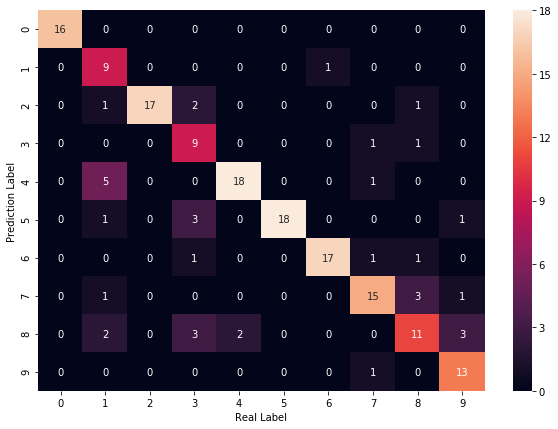

In [50]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [67]:
plt.hist(list_P)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

In [48]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [65]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:3 index:[5] real:5
#1 min_error:4 index:[1 2] real:2
#2 min_error:4 index:[3] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:2 index:[1] real:1
#5 min_error:4 index:[7] real:7
#6 min_error:2 index:[6] real:6
#7 min_error:3 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:5 index:[5 6] real:7
#11 min_error:4 index:[1 8] real:4
#12 min_error:2 index:[6] real:6
#13 min_error:4 index:[3] real:3
#14 min_error:1 index:[1] real:1
#15 min_error:3 index:[3] real:3
#16 min_error:5 index:[4 7 8] real:9
#17 min_error:2 index:[1] real:1
#18 min_error:3 index:[9] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:1 index:[8] real:8
#21 min_error:2 index:[4] real:4
#22 min_error:3 index:[3] real:3
#23 min_error:3 index:[1] real:1
#24 min_error:3 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:1 index:[5] real:5
#27 min_error:3 index:[3] real:3
#28 min_error:3 index:[1] real:6
#29 min_error:3 index:[9] real:9
#30 min_er

### part 2. add more classifier

real1 ->4

In [68]:
winner_list_append = []
classes = [[1,3,8,9],[0,1,3,5,7],[0,1,5,6,7],[0,4,7,9],[1,2,6,7,8]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list_append.append(winner)

number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.50989 stdev: 0.09088
Best fitness: 0.70006 - size: (2, 13) - species 6 - id 138
Average adjusted fitness: 0.280
Mean genetic distance 2.920, standard deviation 0.491
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.896 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55912 stdev: 0.08633
Best fitness: 0.72233 - size: (3, 15) - species 25 - id 373
Average adjusted fitness: 0.260
Mean genetic distance 3.009, standard deviation 0.469
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.867 sec (7.882 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57533 stdev: 0.08037
Best fitness: 0.72233 - size: (3, 15) - species 25 - id 373
Average adjusted fitness: 0.262
Mean genetic distance 3.019, standard deviation 0.467
Population of 199 members in 35 species
Total extinct

Population's average fitness: 0.64296 stdev: 0.08577
Best fitness: 0.79221 - size: (6, 20) - species 16 - id 2983
Average adjusted fitness: 0.264
Mean genetic distance 3.243, standard deviation 0.466
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 8.343 sec (7.949 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64420 stdev: 0.09538
Best fitness: 0.79221 - size: (6, 20) - species 16 - id 2983
Average adjusted fitness: 0.354
Mean genetic distance 3.260, standard deviation 0.459
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.373 sec (8.042 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64817 stdev: 0.08267
Best fitness: 0.79221 - size: (6, 20) - species 16 - id 2983
Average adjusted fitness: 0.247
Mean genetic distance 3.265, standard deviation 0.463
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 10.281 sec (8.285 average)

 *****

Population's average fitness: 0.66026 stdev: 0.09169
Best fitness: 0.81385 - size: (6, 20) - species 25 - id 4712
Average adjusted fitness: 0.257
Mean genetic distance 3.218, standard deviation 0.510
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.864 sec (8.474 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66620 stdev: 0.08545
Best fitness: 0.81385 - size: (6, 20) - species 25 - id 4712
Average adjusted fitness: 0.238
Mean genetic distance 3.180, standard deviation 0.500
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 8.532 sec (8.484 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.66638 stdev: 0.08814
Best fitness: 0.81385 - size: (6, 20) - species 25 - id 4712
Average adjusted fitness: 0.331
Mean genetic distance 3.210, standard deviation 0.504
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 9.085 sec (8.542 average)

 ******

Population's average fitness: 0.66351 stdev: 0.09909
Best fitness: 0.82560 - size: (8, 25) - species 25 - id 8307
Average adjusted fitness: 0.331
Mean genetic distance 3.282, standard deviation 0.556
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 9.776 sec (9.634 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65726 stdev: 0.09332
Best fitness: 0.82560 - size: (8, 25) - species 25 - id 8307
Average adjusted fitness: 0.254
Mean genetic distance 3.268, standard deviation 0.559
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 9.641 sec (9.680 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.64834 stdev: 0.10098
Best fitness: 0.82560 - size: (8, 25) - species 25 - id 8307
Average adjusted fitness: 0.248
Mean genetic distance 3.260, standard deviation 0.552
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 9.775 sec (9.728 average)

 ******

Population's average fitness: 0.65465 stdev: 0.10946
Best fitness: 0.83983 - size: (15, 42) - species 65 - id 13977
Average adjusted fitness: 0.351
Mean genetic distance 3.136, standard deviation 0.568
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.327 sec (11.502 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65859 stdev: 0.09470
Best fitness: 0.83983 - size: (15, 42) - species 65 - id 13977
Average adjusted fitness: 0.255
Mean genetic distance 3.150, standard deviation 0.583
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 11.233 sec (11.631 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65565 stdev: 0.10550
Best fitness: 0.83983 - size: (15, 42) - species 65 - id 13977
Average adjusted fitness: 0.253
Mean genetic distance 3.163, standard deviation 0.611
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 12.238 sec (11.796 avera

Population's average fitness: 0.59132 stdev: 0.06628
Best fitness: 0.71181 - size: (7, 22) - species 1 - id 2245
Average adjusted fitness: 0.189
Mean genetic distance 3.261, standard deviation 0.476
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.571 sec (7.279 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.59701 stdev: 0.06356
Best fitness: 0.71181 - size: (7, 22) - species 1 - id 2245
Average adjusted fitness: 0.188
Mean genetic distance 3.287, standard deviation 0.480
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.672 sec (7.352 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59223 stdev: 0.06797
Best fitness: 0.71181 - size: (7, 22) - species 1 - id 2245
Average adjusted fitness: 0.209
Mean genetic distance 3.251, standard deviation 0.482
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.408 sec (7.381 average)

 ****** Ru

Population's average fitness: 0.60798 stdev: 0.07494
Best fitness: 0.72789 - size: (11, 29) - species 1 - id 5269
Average adjusted fitness: 0.191
Mean genetic distance 3.184, standard deviation 0.534
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 10.006 sec (9.171 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.60938 stdev: 0.07093
Best fitness: 0.72789 - size: (11, 29) - species 1 - id 5269
Average adjusted fitness: 0.146
Mean genetic distance 3.189, standard deviation 0.555
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 11.849 sec (9.588 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.60598 stdev: 0.07392
Best fitness: 0.72789 - size: (11, 29) - species 1 - id 5269
Average adjusted fitness: 0.197
Mean genetic distance 3.187, standard deviation 0.560
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 8.970 sec (9.679 average)

 ****

Population's average fitness: 0.62414 stdev: 0.07444
Best fitness: 0.73284 - size: (9, 31) - species 18 - id 8818
Average adjusted fitness: 0.150
Mean genetic distance 3.075, standard deviation 0.578
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 8.854 sec (8.967 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.62116 stdev: 0.08046
Best fitness: 0.73717 - size: (9, 28) - species 58 - id 10000
Average adjusted fitness: 0.195
Mean genetic distance 3.076, standard deviation 0.593
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 8.741 sec (8.977 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.62021 stdev: 0.07604
Best fitness: 0.73717 - size: (9, 28) - species 58 - id 10000
Average adjusted fitness: 0.176
Mean genetic distance 3.113, standard deviation 0.590
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.353 sec (9.055 average)

 ****

Population's average fitness: 0.62444 stdev: 0.08217
Best fitness: 0.75387 - size: (13, 30) - species 54 - id 11515
Average adjusted fitness: 0.180
Mean genetic distance 3.254, standard deviation 0.580
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 10.017 sec (9.726 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.63480 stdev: 0.08285
Best fitness: 0.75387 - size: (13, 30) - species 54 - id 11515
Average adjusted fitness: 0.168
Mean genetic distance 3.269, standard deviation 0.558
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 10.245 sec (9.790 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.63003 stdev: 0.08135
Best fitness: 0.75387 - size: (13, 30) - species 54 - id 11515
Average adjusted fitness: 0.200
Mean genetic distance 3.250, standard deviation 0.561
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 9.789 sec (9.808 average)


Population's average fitness: 0.60011 stdev: 0.07824
Best fitness: 0.73036 - size: (5, 18) - species 18 - id 2086
Average adjusted fitness: 0.210
Mean genetic distance 3.273, standard deviation 0.480
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 7.497 sec (7.235 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60228 stdev: 0.07714
Best fitness: 0.73036 - size: (5, 18) - species 18 - id 2086
Average adjusted fitness: 0.205
Mean genetic distance 3.295, standard deviation 0.491
Population of 189 members in 44 species
Total extinctions: 0
Generation time: 7.730 sec (7.325 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60823 stdev: 0.07511
Best fitness: 0.73036 - size: (5, 18) - species 18 - id 2086
Average adjusted fitness: 0.148
Mean genetic distance 3.267, standard deviation 0.480
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 7.070 sec (7.368 average)

 ******

Population's average fitness: 0.59755 stdev: 0.07977
Best fitness: 0.76252 - size: (7, 26) - species 50 - id 4529
Average adjusted fitness: 0.179
Mean genetic distance 3.222, standard deviation 0.575
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 8.202 sec (8.205 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.60817 stdev: 0.08114
Best fitness: 0.76252 - size: (7, 26) - species 50 - id 4529
Average adjusted fitness: 0.137
Mean genetic distance 3.257, standard deviation 0.549
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 8.303 sec (8.227 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60018 stdev: 0.08400
Best fitness: 0.76252 - size: (7, 26) - species 50 - id 4529
Average adjusted fitness: 0.194
Mean genetic distance 3.235, standard deviation 0.544
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.349 sec (8.262 average)

 ******

Population's average fitness: 0.59214 stdev: 0.08471
Best fitness: 0.76252 - size: (7, 26) - species 50 - id 4529
Average adjusted fitness: 0.166
Mean genetic distance 3.138, standard deviation 0.559
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 9.119 sec (8.842 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.58643 stdev: 0.08359
Best fitness: 0.76252 - size: (7, 26) - species 50 - id 4529
Average adjusted fitness: 0.143
Mean genetic distance 3.101, standard deviation 0.555
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 9.301 sec (8.881 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.58243 stdev: 0.08381
Best fitness: 0.76252 - size: (7, 26) - species 50 - id 4529
Average adjusted fitness: 0.156
Mean genetic distance 3.133, standard deviation 0.554
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 9.481 sec (8.931 average)

 ******

Population's average fitness: 0.59016 stdev: 0.09175
Best fitness: 0.77613 - size: (8, 27) - species 50 - id 10343
Average adjusted fitness: 0.201
Mean genetic distance 3.162, standard deviation 0.542
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.070 sec (9.038 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.59834 stdev: 0.09184
Best fitness: 0.77613 - size: (8, 27) - species 50 - id 10343
Average adjusted fitness: 0.208
Mean genetic distance 3.166, standard deviation 0.565
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 9.179 sec (9.090 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.60402 stdev: 0.09618
Best fitness: 0.77613 - size: (8, 27) - species 50 - id 10343
Average adjusted fitness: 0.202
Mean genetic distance 3.148, standard deviation 0.571
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 9.087 sec (9.113 average)

 ***

Population's average fitness: 0.63551 stdev: 0.10637
Best fitness: 0.83859 - size: (8, 24) - species 37 - id 1716
Average adjusted fitness: 0.315
Mean genetic distance 3.250, standard deviation 0.467
Population of 198 members in 48 species
Total extinctions: 0
Generation time: 6.825 sec (6.722 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65282 stdev: 0.09111
Best fitness: 0.83859 - size: (8, 24) - species 37 - id 1716
Average adjusted fitness: 0.289
Mean genetic distance 3.261, standard deviation 0.465
Population of 202 members in 49 species
Total extinctions: 0
Generation time: 6.916 sec (6.779 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64769 stdev: 0.09630
Best fitness: 0.84416 - size: (5, 19) - species 16 - id 1925
Average adjusted fitness: 0.386
Mean genetic distance 3.259, standard deviation 0.460
Population of 203 members in 49 species
Total extinctions: 0
Generation time: 7.274 sec (6.839 average)

 ******

Population's average fitness: 0.68008 stdev: 0.11108
Best fitness: 0.86333 - size: (10, 27) - species 15 - id 3070
Average adjusted fitness: 0.336
Mean genetic distance 3.338, standard deviation 0.535
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.159 sec (7.861 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.69217 stdev: 0.10404
Best fitness: 0.86333 - size: (10, 27) - species 15 - id 3070
Average adjusted fitness: 0.308
Mean genetic distance 3.322, standard deviation 0.544
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.370 sec (7.938 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.68757 stdev: 0.10729
Best fitness: 0.86333 - size: (10, 27) - species 15 - id 3070
Average adjusted fitness: 0.443
Mean genetic distance 3.301, standard deviation 0.535
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.383 sec (7.996 average)

 ***

Population's average fitness: 0.69279 stdev: 0.10864
Best fitness: 0.88188 - size: (14, 41) - species 31 - id 7804
Average adjusted fitness: 0.299
Mean genetic distance 3.240, standard deviation 0.599
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 8.610 sec (8.849 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.68129 stdev: 0.11058
Best fitness: 0.88188 - size: (14, 41) - species 31 - id 7804
Average adjusted fitness: 0.281
Mean genetic distance 3.222, standard deviation 0.614
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 8.948 sec (8.869 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.68880 stdev: 0.10715
Best fitness: 0.88188 - size: (14, 41) - species 31 - id 7804
Average adjusted fitness: 0.327
Mean genetic distance 3.202, standard deviation 0.599
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 9.236 sec (8.929 average)

 ***

Population's average fitness: 0.69491 stdev: 0.12534
Best fitness: 0.89177 - size: (15, 41) - species 60 - id 10490
Average adjusted fitness: 0.353
Mean genetic distance 3.044, standard deviation 0.596
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 9.388 sec (9.409 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.68941 stdev: 0.12491
Best fitness: 0.89177 - size: (15, 41) - species 60 - id 10490
Average adjusted fitness: 0.371
Mean genetic distance 3.069, standard deviation 0.584
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 9.391 sec (9.407 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.67663 stdev: 0.12743
Best fitness: 0.89177 - size: (15, 41) - species 60 - id 10490
Average adjusted fitness: 0.422
Mean genetic distance 3.092, standard deviation 0.580
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.155 sec (9.383 average)

 

Mean genetic distance 3.240, standard deviation 0.480
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 6.720 sec (6.190 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61463 stdev: 0.09118
Best fitness: 0.79344 - size: (5, 21) - species 18 - id 1396
Average adjusted fitness: 0.317
Mean genetic distance 3.251, standard deviation 0.477
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.074 sec (6.278 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62098 stdev: 0.08942
Best fitness: 0.79344 - size: (5, 21) - species 18 - id 1396
Average adjusted fitness: 0.233
Mean genetic distance 3.254, standard deviation 0.466
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.222 sec (6.470 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62259 stdev: 0.09383
Best fitness: 0.79344 - size: (5, 21) - species 18 - id 1396
A

Mean genetic distance 3.281, standard deviation 0.501
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 8.300 sec (7.948 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.65140 stdev: 0.10280
Best fitness: 0.80519 - size: (3, 17) - species 47 - id 3391
Average adjusted fitness: 0.270
Mean genetic distance 3.290, standard deviation 0.495
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.791 sec (7.977 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.65924 stdev: 0.09635
Best fitness: 0.80519 - size: (3, 17) - species 47 - id 3391
Average adjusted fitness: 0.219
Mean genetic distance 3.287, standard deviation 0.501
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.411 sec (8.039 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65758 stdev: 0.09600
Best fitness: 0.80519 - size: (3, 17) - species 47 - id 3391


Mean genetic distance 3.261, standard deviation 0.570
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.037 sec (8.900 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.65460 stdev: 0.10567
Best fitness: 0.82560 - size: (14, 35) - species 42 - id 7744
Average adjusted fitness: 0.284
Mean genetic distance 3.285, standard deviation 0.572
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 9.048 sec (8.943 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.65106 stdev: 0.10829
Best fitness: 0.82560 - size: (14, 35) - species 42 - id 7744
Average adjusted fitness: 0.212
Mean genetic distance 3.305, standard deviation 0.571
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.005 sec (9.005 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.65224 stdev: 0.10428
Best fitness: 0.82560 - size: (14, 35) - species 42 - id 77

Mean genetic distance 3.200, standard deviation 0.560
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 9.429 sec (9.335 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.64176 stdev: 0.11732
Best fitness: 0.82870 - size: (14, 34) - species 61 - id 10675
Average adjusted fitness: 0.365
Mean genetic distance 3.155, standard deviation 0.577
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 10.046 sec (9.422 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.66444 stdev: 0.10985
Best fitness: 0.82870 - size: (14, 34) - species 61 - id 10675
Average adjusted fitness: 0.306
Mean genetic distance 3.156, standard deviation 0.600
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 10.286 sec (9.538 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.66492 stdev: 0.11132
Best fitness: 0.82870 - size: (14, 34) - species 61 - i

In [69]:
appended_winner_list = winner_list + winner_list_append

20

In [70]:
appended_number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,1],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0]]

In [73]:
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]] + classes



In [74]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(appended_winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [75]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(20):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(20 - np.sum(appended_number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [76]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:4 index:[5] real:5
#1 min_error:4 index:[2] real:2
#2 min_error:6 index:[3] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:4 index:[1] real:1
#5 min_error:5 index:[7] real:7
#6 min_error:3 index:[6] real:6
#7 min_error:3 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:3 index:[1] real:1
#10 min_error:8 index:[7] real:7
#11 min_error:4 index:[1] real:4
#12 min_error:4 index:[6] real:6
#13 min_error:4 index:[3] real:3
#14 min_error:2 index:[1] real:1
#15 min_error:3 index:[3] real:3
#16 min_error:7 index:[5] real:9
#17 min_error:3 index:[1] real:1
#18 min_error:5 index:[7] real:7
#19 min_error:1 index:[6] real:6
#20 min_error:4 index:[8] real:8
#21 min_error:2 index:[4] real:4
#22 min_error:3 index:[3] real:3
#23 min_error:5 index:[1] real:1
#24 min_error:4 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:3 index:[5] real:5
#27 min_error:3 index:[3] real:3
#28 min_error:4 index:[1] real:6
#29 min_error:5 index:[9] real:9
#30 min_error:5 inde

In [98]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
        
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  2  1  0  1  1  0  0]
 [ 0  0 17  2  0  0  0  0  1  0]
 [ 0  0  0 10  0  1  0  0  1  0]
 [ 0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  2  0 17  0  0  1  3]
 [ 0  0  0  0  1  0 17  0  1  0]
 [ 1  0  0  0  1  0  0 18  2  0]
 [ 0  3  0  2  1  0  0  0 11  1]
 [ 0  0  0  0  0  0  0  0  0 14]]


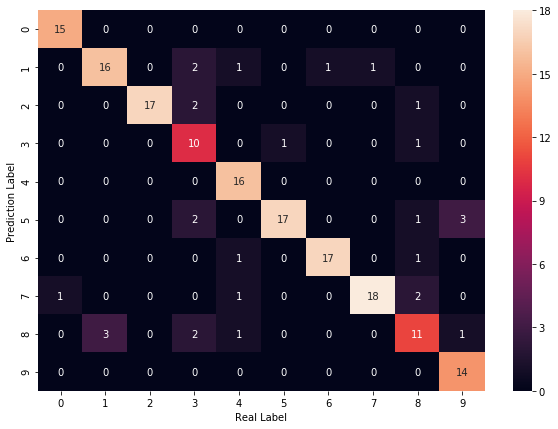

In [100]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [18]:
## 加一个confusion matrix 将容易出错的两个数字增加分类！！！！比如 8 和6 容易分错，设计一个code 将8 和6 分成两类

In [19]:
## 分别绘制15个分类器的准确率随着训练的变化，有可能ecoc 的还比他们都高哈哈哈